Machine Learning Project
Twitter Sentiment Analysis



Dependencies: Add Your dependencies here



In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

Read the data

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")


In [3]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
train.shape

(31962, 3)

In [5]:
train.info

<bound method DataFrame.info of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [6]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [7]:
test.shape

(17197, 2)

In [8]:
test.info

<bound method DataFrame.info of           id                                              tweet
0      31963  #studiolife #aislife #requires #passion #dedic...
1      31964   @user #white #supremacists want everyone to s...
2      31965  safe ways to heal your #acne!!    #altwaystohe...
3      31966  is the hp and the cursed child book up for res...
4      31967    3rd #bihday to my amazing, hilarious #nephew...
...      ...                                                ...
17192  49155  thought factory: left-right polarisation! #tru...
17193  49156  feeling like a mermaid ð #hairflip #neverre...
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...
17195  49158  happy, at work conference: right mindset leads...
17196  49159  my   song "so glad" free download!  #shoegaze ...

[17197 rows x 2 columns]>

Plotted the count for each label

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


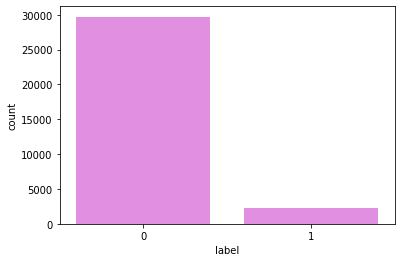

In [9]:
import seaborn
seaborn.countplot(train['label'],color='Violet')

In [10]:
data_column1 = list(train[train['label']==1]['tweet'].str.len())
data_column0 = list(train[train['label']==0]['tweet'].str.len())


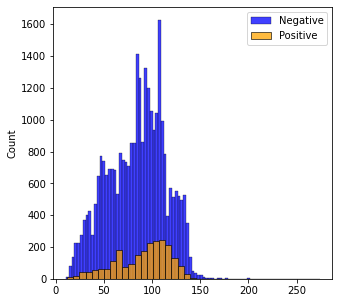

In [11]:
plt.figure(figsize=(5,5))
seaborn.histplot(data_column0,color='Blue')
seaborn.histplot(data_column1,color='Orange')

plt.legend(labels=['Negative','Positive'])


Print the number of null values in each column

In [12]:
train.isna().sum()

id       0
label    0
tweet    0
dtype: int64

Removed:


1.   Double Spaces
2.   Hypens and arrows
3.   Emojis
4.   URL
5.   Any other non english or special symbol
6.   Chat Words
7.   Emoticons

Replaced wrong spellings with correct spellings



In [13]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [14]:
def remove_html(tweet):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', tweet)

tweet = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""
train["tweet_no_html"] = train["tweet"].apply(lambda tweet: remove_html(tweet))
train["tweet"] = train["tweet"].apply(lambda tweet: remove_html(tweet))

train.head()

,id,label,tweet,tweet_no_html
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [15]:
def remove_extra_spaces(tweet):
  return re.sub(' +',' ',tweet)

train["tweet_no_spaces"] = train["tweet"].apply(lambda tweet: remove_extra_spaces(tweet))

train["tweet"] = train["tweet"].apply(lambda tweet: remove_extra_spaces(tweet))

train.head()

,id,label,tweet,tweet_no_html,tweet_no_spaces
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ur...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: society now #motivation


In [16]:
def remove_urls(tweet):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', tweet)
train["tweet_no_url"] = train["tweet"].apply(lambda tweet: remove_urls(tweet))
train["tweet"] = train["tweet"].apply(lambda tweet: remove_urls(tweet))

train.head()

,id,label,tweet,tweet_no_html,tweet_no_spaces,tweet_no_url
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ur...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:

def remove_punctuation_mark(tweet):
    return tweet.translate(str.maketrans('', '', string.punctuation))

train["tweet_no_punct"] = train["tweet"].apply(lambda tweet: remove_punctuation_mark(tweet))
train["tweet"] = train["tweet"].apply(lambda tweet: remove_punctuation_mark(tweet))


In [18]:
train.head()

,id,label,tweet,tweet_no_html,tweet_no_spaces,tweet_no_url,tweet_no_punct
0,1,0,user when a father is dysfunctional and is so...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,model i love u take with u all the time in urð...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model i love u take with u all the time in ur...,model i love u take with u all the time in urð...
4,5,0,factsguide society now motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation


In [19]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
train["tweet_no_emoji"] = train["tweet"].apply(lambda tweet: remove_emoji(tweet))
train["tweet"] = train["tweet"].apply(lambda tweet: remove_emoji(tweet))

train.head()

,id,label,tweet,tweet_no_html,tweet_no_spaces,tweet_no_url,tweet_no_punct,tweet_no_emoji
0,1,0,user when a father is dysfunctional and is so...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,model i love u take with u all the time in urð...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model i love u take with u all the time in ur...,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...
4,5,0,factsguide society now motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation


In [20]:
!pip install pyspellchecker


In [21]:
 from spellchecker import SpellChecker as SC


 def correct_spellings(tweet):
     corrected_tweet = []
     misspelled_words = SC().unknown(tweet.split())
     for word in tweet.split():
         if word in misspelled_words:
             corrected_tweet.append(SC().correction(word))
         else:
             corrected_tweet.append(word)
     return " ".join(corrected_tweet)
 train["tweet_correct_spell"] = train["tweet"].apply(lambda tweet: correct_spellings(tweet))
 train["tweet"] = train["tweet"].apply(lambda tweet: correct_spellings(tweet))



In [22]:
emoticons = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [23]:
def removingemoticons(tweet):

    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in emoticons) + u')')

    return emoticon_pattern.sub(r'', tweet)

train["tweet_no_emoticon"]=train["tweet"].apply(lambda tweet: removingemoticons(tweet))
train["tweet"]=train["tweet"].apply(lambda tweet: removingemoticons(tweet))
train.head()

,id,label,tweet,tweet_no_html,tweet_no_spaces,tweet_no_url,tweet_no_punct,tweet_no_emoji,tweet_no_emoticon
0,1,0,user when a father is dysfunctional and is so...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,user when a father is dysfunctional and is so...,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...,user user thanks for lyft credit i cant use ca...,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,model i love u take with u all the time in urð...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model i love u take with u all the time in ur...,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...
4,5,0,factsguide society now motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation,factsguide society now motivation


In [24]:
non_english_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [25]:
words_map_dict = {}
words_list = []
for line in non_english_words_str.split("\n"):
    if line != "":
        w = line.split("=")[0]
        w_expanded = line.split("=")[1]
        words_list.append(w)
        words_map_dict[w] = w_expanded
words_list = set(words_list)

def words_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in words_list:
            new_text.append(words_map_dict[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)
train["tweet (no non-english words)"] = train["tweet"].apply(lambda tweet: words_conversion(tweet))
train["tweet"] = train["tweet"].apply(lambda tweet: words_conversion(tweet))
train.head()

,id,label,tweet,tweet_no_html,tweet_no_spaces,tweet_no_url,tweet_no_punct,tweet_no_emoji,tweet_no_emoticon,tweet (no non-english words)
0,1,0,user when a father is dysfunctional and is so ...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,user when a father is dysfunctional and is so...,user when a father is dysfunctional and is so...,user when a father is dysfunctional and is so ...
1,2,0,user user thanks for lyft credit i cant use ca...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...,user user thanks for lyft credit i cant use ca...,user user thanks for lyft credit i cant use ca...,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,model i love You take with You all the time in...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model i love u take with u all the time in ur...,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...,model i love You take with You all the time in...
4,5,0,factsguide society now motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation,factsguide society now motivation,factsguide society now motivation


Plot a word cloud of positive label and negative label

In [26]:
c=train.groupby('label')
group0=c.get_group(0)
group0.head()

,id,label,tweet,tweet_no_html,tweet_no_spaces,tweet_no_url,tweet_no_punct,tweet_no_emoji,tweet_no_emoticon,tweet (no non-english words)
0,1,0,user when a father is dysfunctional and is so ...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,user when a father is dysfunctional and is so...,user when a father is dysfunctional and is so...,user when a father is dysfunctional and is so ...
1,2,0,user user thanks for lyft credit i cant use ca...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...,user user thanks for lyft credit i cant use ca...,user user thanks for lyft credit i cant use ca...,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,model i love You take with You all the time in...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model i love u take with u all the time in ur...,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...,model i love u take with u all the time in urð...,model i love You take with You all the time in...
4,5,0,factsguide society now motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation,factsguide society now motivation,factsguide society now motivation,factsguide society now motivation


In [27]:
group1=c.get_group(1)
group1.head()

,id,label,tweet,tweet_no_html,tweet_no_spaces,tweet_no_url,tweet_no_punct,tweet_no_emoji,tweet_no_emoticon,tweet (no non-english words)
13,14,1,user cnn calls michigan middle school build th...,@user #cnn calls #michigan middle school 'buil...,@user #cnn calls #michigan middle school 'buil...,@user #cnn calls #michigan middle school 'buil...,user cnn calls michigan middle school build th...,user cnn calls michigan middle school build th...,user cnn calls michigan middle school build th...,user cnn calls michigan middle school build th...
14,15,1,no comment in australia opkillingbay seashephe...,no comment! in #australia #opkillingbay #se...,no comment! in #australia #opkillingbay #seash...,no comment! in #australia #opkillingbay #seash...,no comment in australia opkillingbay seashephe...,no comment in australia opkillingbay seashephe...,no comment in australia opkillingbay seashephe...,no comment in australia opkillingbay seashephe...
17,18,1,retweet if you agree,retweet if you agree!,retweet if you agree!,retweet if you agree!,retweet if you agree,retweet if you agree,retweet if you agree,retweet if you agree
23,24,1,user user lumpy says i am a prove it lumpy,@user @user lumpy says i am a . prove it lumpy.,@user @user lumpy says i am a . prove it lumpy.,@user @user lumpy says i am a . prove it lumpy.,user user lumpy says i am a prove it lumpy,user user lumpy says i am a prove it lumpy,user user lumpy says i am a prove it lumpy,user user lumpy says i am a prove it lumpy
34,35,1,its unbelievable that in the 21st century wed ...,it's unbelievable that in the 21st century we'...,it's unbelievable that in the 21st century we'...,it's unbelievable that in the 21st century we'...,its unbelievable that in the 21st century wed ...,its unbelievable that in the 21st century wed ...,its unbelievable that in the 21st century wed ...,its unbelievable that in the 21st century wed ...


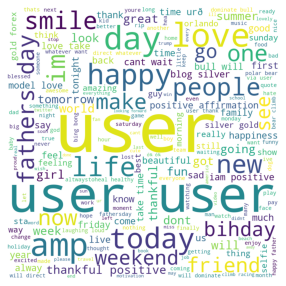

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords=set(STOPWORDS)
words=''
for number in group0.tweet:
      value = str(number)
      s = value.split()
      for i in range(len(s)):
        s[i] = s[i].lower()
      words += " ".join(s)+" "
  
word_cloud = WordCloud(width = 1000, height = 1000, background_color ='White',stopwords = stopwords,min_font_size = 12).generate(words)
  
                      
plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

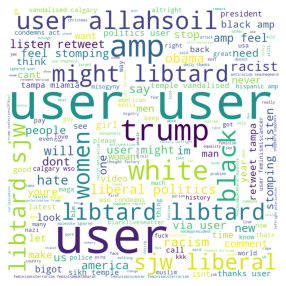

In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
words=''
for number in group1.tweet:
      
    value = str(number)
  
    s = value.split()
      
    for i in range(len(s)):
        s[i] = s[i].lower()
      
    words += " ".join(s)+" "
  
word_cloud = WordCloud(width = 1000, height = 1000, background_color ='White',stopwords = stopwords,min_font_size = 12).generate(words)
                         
plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

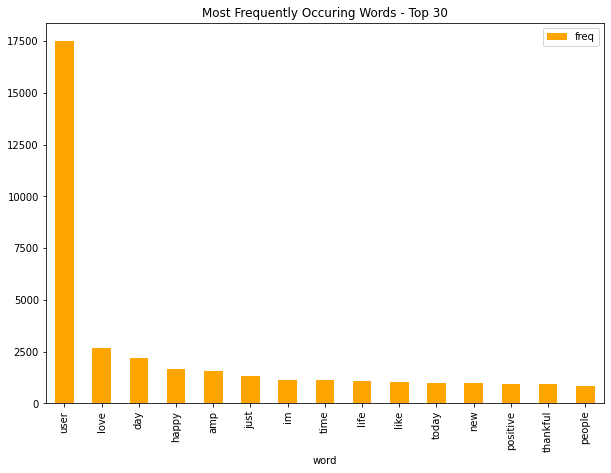

In [30]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(15).plot(x='word', y='freq', kind='bar', figsize=(10, 7), color = 'orange')
plt.title("Most Frequently Occuring Words - Top 30")

In [31]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [33]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [34]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [36]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_valid)

print("F1 score for non-standardize data from logistic regression :", f1_score(y_valid, y_pred))
print("Training Accuracy for non-standardize data from logistic regression model: ", lr.score(x_train,y_train))
print("Validation Accuracy for non-standardize data from logistic regression model: ", lr.score(x_valid,y_valid))

F1 score for non-standardize data from logistic regression : 0.5597874224977856
Training Accuracy for non-standardize data from logistic regression model:  0.9808935797421885
Validation Accuracy for non-standardize data from logistic regression model:  0.937805030659492


In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_valid)

print("F1 score for non-standardize data from Random Forest :", f1_score(y_valid, y_pred))
print("Training Accuracy for non-standardize data from Random Forest model: ", rf.score(x_train,y_train))
print("Validation Accuracy for non-standardize data from Random Forest model: ", rf.score(x_valid,y_valid))

F1 score for non-standardize data from Random Forest : 0.6087844739530133
Training Accuracy for non-standardize data from Random Forest model:  0.9990822243544283
Validation Accuracy for non-standardize data from Random Forest model:  0.9520710799649605


In [40]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=42, max_iter=987)
clf_mlp.fit(x_train, y_train)
y_pred_mlp=clf_mlp.predict(x_valid)

print("F1 score for non-standardize data from MLP :", f1_score(y_valid, y_pred))
print("Training Accuracy for non-standardize data from MLP model: ", clf_mlp.score(x_train,y_train))
print("Validation Accuracy for non-standardize data from MLP model: ", clf_mlp.score(x_valid,y_valid))

F1 score for non-standardize data from MLP : 0.6087844739530133
Training Accuracy for non-standardize data from MLP model:  0.999123941429227
Validation Accuracy for non-standardize data from MLP model:  0.9510699536979101


In [52]:
from sklearn.preprocessing import StandardScaler
x_ = sc.fit_transform(x)


x_train, x_valid, y_train, y_valid = train_test_split(x_, y, test_size = 0.25, random_state = 42)

In [53]:
from sklearn.decomposition import PCA
pca = PCA(.90)

In [ ]:
pcs.n_components_

In [54]:
pca.fit(x_)
pca.transform(x_)
x_train=pca.transform(x_train)
x_valid=pca.transform(x_valid)

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_valid)

print("F1 score for standardize data from Logistic Regression :", f1_score(y_valid, y_pred))
print("Training Accuracy for standardize data from Logistic Regression model: ", lr.score(x_train,y_train))
print("Validation Accuracy for standardize data from Logistic Regression model: ", lr.score(x_valid,y_valid))

F1 score for standardize data from Logistic Regression : 0.5597874224977856
Training Accuracy for standardize data from Logistic Regression model:  0.9808935797421885
Validation Accuracy for standardize data from Logistic Regression model:  0.937805030659492


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_valid)

print("F1 score for standardize data from Random Forest :", f1_score(y_valid, y_pred))
print("Training Accuracy for standardize data from Random Forest model: ", rf.score(x_train,y_train))
print("Validation Accuracy for standardize data from Random Forest model: ", rf.score(x_valid,y_valid))

F1 score for standardize data from Random Forest : 0.44566712517193946
Training Accuracy for standardize data from Random Forest model:  0.9990822243544283
Validation Accuracy for standardize data from Random Forest model:  0.9495682642973345


In [61]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=42, max_iter=987)
clf_mlp.fit(x_train, y_train)
y_pred=clf_mlp.predict(x_valid)

print("F1 score for standardize data from MLP :", f1_score(y_valid, y_pred))
print("Training Accuracy for standardize data from MLP model: ", clf_mlp.score(x_train,y_train))
print("Validation Accuracy for standardize data from MLP model: ", clf_mlp .score(x_valid,y_valid))

F1 score for standardize data from MLP : 0.6666666666666666
Training Accuracy for standardize data from MLP model:  0.9980810145592591
Validation Accuracy for standardize data from MLP model:  0.9555750218996371


Accuracy with cross validation

In [68]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
k = 5
kf = KFold(n_splits=k, random_state=None)
model1 =  MLPClassifier(random_state=42, max_iter=987)


In [69]:
result = cross_val_score(model1 , x_, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9559474908707056
